In [1]:
from gcell.rna.gencode import Gencode

gencode = Gencode(assembly="hg38", version="29")


In [2]:
import os
import subprocess

import numpy as np
import pandas as pd
import zarr
from gcell.rna.gencode import Gencode
from pyranges import PyRanges as pr

In [3]:
gene_exp = pd.read_csv("/gpfs/home/asun/jin_lab/get/2_k562_preprocess/k562.rna.csv")

In [4]:
gene_exp

,gene_name,TPM
0,A1BG,1.145935
1,A1BG-AS1,0.972370
2,A1CF,0.020475
3,A2M,0.058738
4,A2M-AS1,0.023795
...,...,...
36596,ZYG11B,1.728077
36597,ZYX,0.963340
36598,ZZEF1,1.376604
36599,hsa-mir-1253,0.000000


In [5]:
unique_genes = gene_exp["gene_name"].unique()
len(unique_genes)

36591

In [6]:
promoter_exp = pd.merge(
            gencode.gtf, gene_exp, left_on="gene_name", right_on="gene_name"
        )

In [7]:
# Genes in gene_exp not in gencode.gtf
left_out_genes = gene_exp.loc[~gene_exp['gene_name'].isin(gencode.gtf['gene_name']), 'gene_name'].unique()

print("Genes left out during merge:", left_out_genes)
print("Number of genes left out:", len(left_out_genes))


Genes left out during merge: ['ABITRAM' 'AC000050.1' 'AC000065.1' ... 'ZNF875' 'ZNRD2' 'hsa-mir-423']
Number of genes left out: 2861


In [8]:
promoter_exp

,index,Chromosome,Start,End,Strand,gene_name,gene_id,gene_type,transcript_id,chrom_count,TPM
0,13,chr1,29553,29553,+,MIR1302-2HG,ENSG00000243485,lincRNA,ENST00000473358.1,1,0.319349
1,17,chr1,30266,30266,+,MIR1302-2HG,ENSG00000243485,lincRNA,ENST00000469289.1,1,0.319349
2,34,chr1,65418,65418,+,OR4F5,ENSG00000186092,protein_coding,ENST00000641515.2,1,0.000000
3,45,chr1,69054,69054,+,OR4F5,ENSG00000186092,protein_coding,ENST00000335137.4,1,0.000000
4,56,chr1,160445,160445,+,AL627309.4,ENSG00000241599,lincRNA,ENST00000496488.1,1,0.010358
...,...,...,...,...,...,...,...,...,...,...,...
75017,1702203,chrX,155458672,155458672,-,F8A3,ENSG00000277150,protein_coding,ENST00000622749.1,1,0.000000
75018,1702211,chrX,155460005,155460005,-,H2AFB3,ENSG00000277745,protein_coding,ENST00000615853.1,1,0.000000
75019,1702219,chrX,155612936,155612936,-,TMLHE,ENSG00000185973,protein_coding,ENST00000334398.7,1,1.634508
75020,1702240,chrX,155612877,155612877,-,TMLHE,ENSG00000185973,protein_coding,ENST00000369439.4,1,1.634508


In [9]:
unique_genes = promoter_exp["gene_name"].unique()
len(unique_genes)

33730

In [10]:
atac = pr(
            pd.read_csv(
                "/gpfs/home/asun/jin_lab/get/2_k562_preprocess/k562.atac.bed",
                sep="\t",
                header=None,
                names=["Chromosome", "Start", "End", "aTPM"],
            ).reset_index(),
            int64=True,
        )
atac

,index,Chromosome,Start,End,aTPM
0,0,chr1,9741,10686,0.098325
1,1,chr1,15776,16624,0.013298
2,2,chr1,17144,17964,0.010069
3,3,chr1,28875,29711,0.021592
4,4,chr1,30453,31320,0.015164
...,...,...,...,...,...
219197,219197,chrX,155997167,155998068,0.222401
219198,219198,chrX,156001230,156002032,0.189801
219199,219199,chrX,156002473,156003187,0.090834
219200,219200,chrX,156005067,156005869,0.012226


In [11]:
#azimuth marker genes
marker_genes = ['C1ql3', 'Cdh13', 'Il1rapl2', 'Zfp804b', 'Dscaml1', 'Slit3', 'Galnt14', 'Nell2', 'Ak5', 'Cck']

# Check which are present
present_genes = [g for g in marker_genes if g in promoter_exp["gene_name"].values]
missing_genes = [g for g in marker_genes if g not in promoter_exp["gene_name"].values]

print("Present in promoter_exp:", present_genes)
print("Missing from promoter_exp:", missing_genes)

Present in promoter_exp: ['C1ql3', 'Cdh13', 'Il1rapl2', 'Zfp804b', 'Dscaml1', 'Slit3', 'Galnt14', 'Nell2', 'Ak5', 'Cck']
Missing from promoter_exp: []


In [12]:
# Or check expression for specific genes
expr_marker_genes = promoter_exp[promoter_exp["gene_name"].isin(marker_genes)]
expr_marker_genes

,index,Chromosome,Start,End,Strand,gene_name,gene_id,gene_type,transcript_id,chrom_count,TPM
13981,613773,chr8,118283732,118283732,+,Cdh13,ENSMUSG00000031841,protein_coding,ENSMUST00000117160.1,1,2.376096
14811,654504,chr9,45430290,45430290,+,Dscaml1,ENSMUSG00000032087,protein_coding,ENSMUST00000034592.9,1,2.360121
17536,782954,chr11,35121223,35121223,+,Slit3,ENSMUSG00000056427,protein_coding,ENSMUST00000069837.3,1,2.782949
28633,1258640,chrX,137570607,137570607,+,Il1rapl2,ENSMUSG00000059203,protein_coding,ENSMUST00000113063.7,1,2.829411
28634,1258667,chrX,137651719,137651719,+,Il1rapl2,ENSMUSG00000059203,protein_coding,ENSMUST00000075471.3,1,2.829411
30563,135861,chr2,13011806,13011806,-,C1ql3,ENSMUSG00000049630,protein_coding,ENSMUST00000061545.6,1,2.753972
34171,250884,chr3,152668360,152668360,-,Ak5,ENSMUSG00000039058,protein_coding,ENSMUST00000045262.10,1,2.538792
35829,369062,chr5,7344756,7344756,-,Zfp804b,ENSMUSG00000092094,protein_coding,ENSMUST00000200317.4,1,2.843680
35830,369075,chr5,6876523,6876523,-,Zfp804b,ENSMUSG00000092094,protein_coding,ENSMUST00000164784.1,1,2.843680
44282,715018,chr9,121495639,121495639,-,Cck,ENSMUSG00000032532,protein_coding,ENSMUST00000216138.1,1,2.955250


In [ ]:
marker_genes = ['C1ql3','Sema3e','Nell2','Celf4','Grm8','Sdk2','Gm26871','Pcsk2','Cck','Rspo2','Zfp804b','Sorcs3','Dpp10','Rimbp2','Ak5','Bmpr1b','Atp2b4',
                'Sgcz','Slc17a7','Ilrapl2']

In [11]:
exp = atac.join(pr(promoter_exp, int64=True).extend(300), how="left").as_df()
exp

join: Strand data from other will be added as strand data to self.
If this is undesired use the flag apply_strand_suffix=False.
To turn off the warning set apply_strand_suffix to True or False.


,index,Chromosome,Start,End,aTPM,index_b,Start_b,End_b,Strand,gene_name,gene_id,gene_type,transcript_id,chrom_count,TPM
0,3,chr1,28875,29711,0.021592,13,29253,29853,+,MIR1302-2HG,ENSG00000243485,lincRNA,ENST00000473358.1,1,0.319349
1,4,chr1,30453,31320,0.015164,17,29966,30566,+,MIR1302-2HG,ENSG00000243485,lincRNA,ENST00000469289.1,1,0.319349
2,27,chr1,816944,817781,0.051480,138,817070,817670,+,FAM87B,ENSG00000177757,lincRNA,ENST00000326734.2,1,0.000000
3,29,chr1,827034,827918,0.381502,142,827307,827907,+,LINC01128,ENSG00000228794,processed_transcript,ENST00000445118.6,1,1.117295
4,29,chr1,827034,827918,0.381502,148,827360,827960,+,LINC01128,ENSG00000228794,processed_transcript,ENST00000608189.4,1,1.117295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245908,219148,chrX,155070859,155071780,0.387412,1702104,155071062,155071662,-,CMC4,ENSG00000182712,protein_coding,ENST00000369484.7,1,0.813667
245909,219154,chrX,155147141,155148121,0.021592,1702142,155147475,155148075,-,MTCP1,ENSG00000214827,protein_coding,ENST00000362018.2,1,0.873247
245910,219162,chrX,155334355,155335223,0.048451,1702172,155334346,155334946,-,CLIC2,ENSG00000155962,protein_coding,ENST00000369449.6,1,0.236565
245911,219168,chrX,155612456,155613320,0.254436,1702240,155612577,155613177,-,TMLHE,ENSG00000185973,protein_coding,ENST00000369439.4,1,1.634508


In [12]:
unique_exp_genes = exp["gene_name"].unique()
len(unique_exp_genes)

19310

In [13]:
unique_exp_genes = set(unique_exp_genes)
unique_genes = set(unique_genes)

In [14]:
len(unique_exp_genes)

19310

In [15]:
len(unique_genes)

33730

In [16]:
missing_from_exp = unique_genes - unique_exp_genes

In [17]:
missing_from_exp

{'AC007347.1',
 'AL353600.1',
 'ALDH1L1',
 'TMEM88',
 'WWC2-AS1',
 'IGKV2OR2-2',
 'AP000919.3',
 'AC129807.1',
 'PEAR1',
 'AL358154.1',
 'LINC00571',
 'HCRT',
 'AC090425.2',
 'FAM153B',
 'MAGEB10',
 'KCNH8',
 'ERN2',
 'KIRREL3',
 'AC105133.1',
 'AC087273.2',
 'AC022167.3',
 'SYT9',
 'AC022167.2',
 'LINC02110',
 'IGHVII-78-1',
 'PAX3',
 'SCN4A',
 'LINC01722',
 'SSU72P8',
 'THSD1',
 'AC090527.3',
 'AC007750.1',
 'TMEM252',
 'AC007991.2',
 'AC107958.3',
 'GGT5',
 'AP000755.1',
 'POTEH-AS1',
 'OR7A5',
 'GYG2',
 'AC005606.2',
 'TNFSF14',
 'LINC02291',
 'AC004477.2',
 'SLCO1C1',
 'SERF1A',
 'KRTAP9-7',
 'CD163',
 'LINC01685',
 'AC004408.1',
 'LINC00442',
 'GRM6',
 'LINC02410',
 'KRTAP10-5',
 'AC005064.1',
 'IDO2',
 'CYLC2',
 'OR2M3',
 'MUC15',
 'AC003070.2',
 'AL353784.1',
 'AC138869.3',
 'AL513164.1',
 'AL590068.2',
 'OR2B3',
 'TMPRSS11B',
 'AL807752.3',
 'LINC02042',
 'AL360181.1',
 'FP475955.2',
 'AC024270.4',
 'OR7C2',
 'AC005303.1',
 'TMEM81',
 'LINC01564',
 'CRNN',
 'AC023794.3',
 'HNR

In [18]:
import pandas as pd

# Filter to only the genes in missing_from_exp
df_filtered = promoter_exp[promoter_exp['gene_name'].isin(missing_from_exp)]

# Group by gene_name and calculate mean TPM
avg_tpm = df_filtered.groupby('gene_name')['TPM'].mean().reset_index()

# Rename column for clarity
avg_tpm.rename(columns={'TPM': 'mean_TPM'}, inplace=True)

print(avg_tpm)

          gene_name  mean_TPM
0              A1BG  1.145935
1              A1CF  0.020475
2           A2M-AS1  0.023795
3             A2ML1  0.070778
4         A2ML1-AS1  0.528078
...             ...       ...
14416        ZSWIM2  0.003480
14417    ZSWIM8-AS1  0.161535
14418          ZXDA  0.139296
14419          ZXDB  0.317671
14420  hsa-mir-1253  0.000000

[14421 rows x 2 columns]


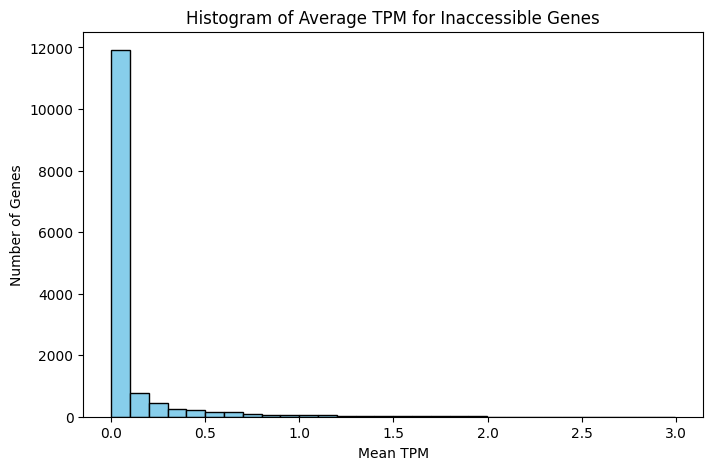

In [19]:
import matplotlib.pyplot as plt

# Histogram of mean TPMs
plt.figure(figsize=(8,5))
plt.hist(avg_tpm['mean_TPM'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Mean TPM')
plt.ylabel('Number of Genes')
plt.title('Histogram of Average TPM for Inaccessible Genes')
plt.show()

In [20]:
import pandas as pd

# Filter to only the genes in missing_from_exp
df_filtered = promoter_exp[promoter_exp['gene_name'].isin(unique_exp_genes)]

# Group by gene_name and calculate mean TPM
avg_tpm = df_filtered.groupby('gene_name')['TPM'].mean().reset_index()

# Rename column for clarity
avg_tpm.rename(columns={'TPM': 'mean_TPM'}, inplace=True)

print(avg_tpm)

      gene_name  mean_TPM
0      A1BG-AS1  0.972370
1           A2M  0.058738
2       A3GALT2  0.000000
3        A4GALT  0.030361
4          AAAS  1.193430
...         ...       ...
19304      ZXDC  1.655013
19305    ZYG11A  1.732240
19306    ZYG11B  1.728077
19307       ZYX  0.963340
19308     ZZEF1  1.376604

[19309 rows x 2 columns]


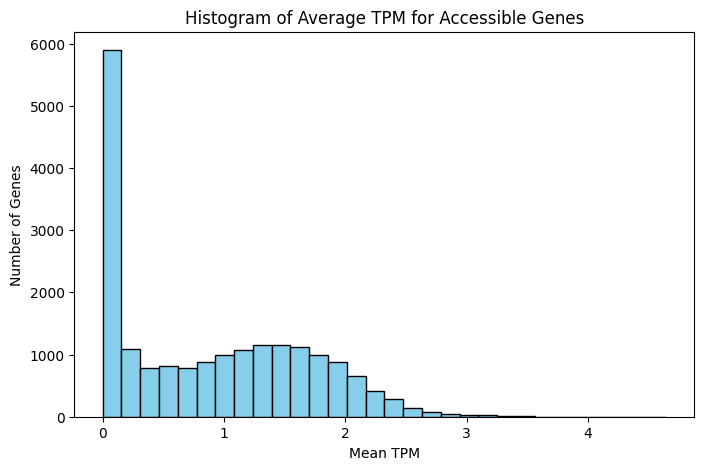

In [21]:
import matplotlib.pyplot as plt

# Histogram of mean TPMs
plt.figure(figsize=(8,5))
plt.hist(avg_tpm['mean_TPM'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Mean TPM')
plt.ylabel('Number of Genes')
plt.title('Histogram of Average TPM for Accessible Genes')
plt.show()

In [14]:
#azimuth marker genes
marker_genes = ['C1ql3', 'Cdh13', 'Il1rapl2', 'Zfp804b', 'Dscaml1', 'Slit3', 'Galnt14', 'Nell2', 'Ak5', 'Cck']

# Check which are present
present_genes = [g for g in marker_genes if g in exp["gene_name"].values]
missing_genes = [g for g in marker_genes if g not in exp["gene_name"].values]

print("Present in exp:", present_genes)
print("Missing from exp:", missing_genes)

Present in exp: ['C1ql3', 'Cdh13', 'Il1rapl2', 'Zfp804b', 'Dscaml1', 'Slit3', 'Galnt14', 'Nell2', 'Ak5', 'Cck']
Missing from exp: []


In [66]:
neg_tpm = exp[exp["TPM"] < 0]
neg_tpm

,index,Chromosome,Start,End,aTPM,index_b,Start_b,End_b,Strand,gene_name,gene_id,gene_type,transcript_id,chrom_count,TPM
961,0,chr1,3094753,3095675,0.044651,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
962,1,chr1,3120133,3120689,0.086326,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
963,2,chr1,3121252,3122011,0.079318,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
964,3,chr1,3292425,3293285,0.119320,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
965,4,chr1,3297205,3298011,0.051502,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143541,127969,chrX,169993838,169994668,0.363007,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
143542,127970,chrX,170004064,170004736,0.113312,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
143543,127971,chrX,170004873,170005776,0.159756,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0
143544,127973,chrX,170674517,170675289,0.162202,-1,-1,-1,+,-1,-1,-1,-1,-1,-1.0


In [31]:
neg_tpm = exp[(exp["TPM"] < 0) & (exp["gene_name"] != '-1')]
neg_tpm

,index,Chromosome,Start,End,aTPM,index_b,Start_b,End_b,Strand,gene_name,gene_id,gene_type,transcript_id,chrom_count,TPM


In [67]:
gene_idx_info = exp.query('index_b!=-1')[['index', 'gene_name', 'Strand']].values
gene_idx_info

array([[35, 'Gm37587', '+'],
       [43, 'Lypla1', '+'],
       [43, 'Lypla1', '+'],
       ...,
       [127948, 'Hccs', '-'],
       [127965, 'G530011O06Rik', '-'],
       [127968, 'Gm15247', '-']], shape=(32738, 3), dtype=object)

In [68]:
exp = (
        exp[["index", "Strand", "TPM"]]
        .groupby(["index", "Strand"])
        .mean()
        .reset_index()
    )
exp

/tmp/ipykernel_3718/2613265687.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["index", "Strand"])


,index,Strand,TPM
0,0,.,NaN
1,0,-,NaN
2,0,+,-1.0
3,1,.,NaN
4,1,-,NaN
...,...,...,...
383920,127973,-,NaN
383921,127973,+,-1.0
383922,127974,.,NaN
383923,127974,-,NaN


In [69]:
exp_n = exp[exp.Strand == "-"].set_index("index")["TPM"].fillna(0)
exp_p = exp[exp.Strand == "+"].set_index("index")["TPM"].fillna(0)
exp_n[exp_n < 0] = 0
exp_p[exp_p < 0] = 0

In [70]:
exp_n_tss = (exp[exp.Strand == "-"].set_index("index")["TPM"] >= 0).fillna(False)
exp_p_tss = (exp[exp.Strand == "+"].set_index("index")["TPM"] >= 0).fillna(False)
